# Train test split to detect overfitting

## Load data

In [1]:
import pandas as pd

path = '../../../data/default_credit_card/output/simplified_features.csv'
df = pd.read_csv(path)
df

,Gender,Age,Married,YearsEmployed,Income,Approved
0,1,30,1,1.25,0.000000,1
1,0,58,1,3.04,632.793678,1
...,...,...,...,...,...,...
687,1,17,1,0.04,662.007321,0
688,1,35,1,8.29,0.000000,0


## Feature selection

In [2]:
target = 'Approved'

y = df[target]
X = df.drop(columns=target)

## Modelling will full data

In [3]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [4]:
model.score(X, y)

0.9927431059506531

## Modelling with split data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [6]:
X_train

,Gender,Age,Married,YearsEmployed,Income
178,0,18,1,1.210,629.156914
265,1,17,0,0.040,658.202514
...,...,...,...,...,...
435,1,19,1,0.000,664.509097
102,1,18,1,0.375,363.758616


In [7]:
X_test

,Gender,Age,Married,YearsEmployed,Income
286,0,28,1,0.00,465.396035
655,1,25,1,2.29,304.452244
...,...,...,...,...,...
677,0,17,1,0.00,391.202301
558,0,22,1,2.29,777.653503


In [8]:
len(X_train) + len(X_test)

689

In [9]:
X

,Gender,Age,Married,YearsEmployed,Income
0,1,30,1,1.25,0.000000
1,0,58,1,3.04,632.793678
...,...,...,...,...,...
687,1,17,1,0.04,662.007321
688,1,35,1,8.29,0.000000


In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
model.score(X_train, y_train)

0.995850622406639

In [12]:
model.score(X_test, y_test)

0.6135265700483091

![](src/tree.png)

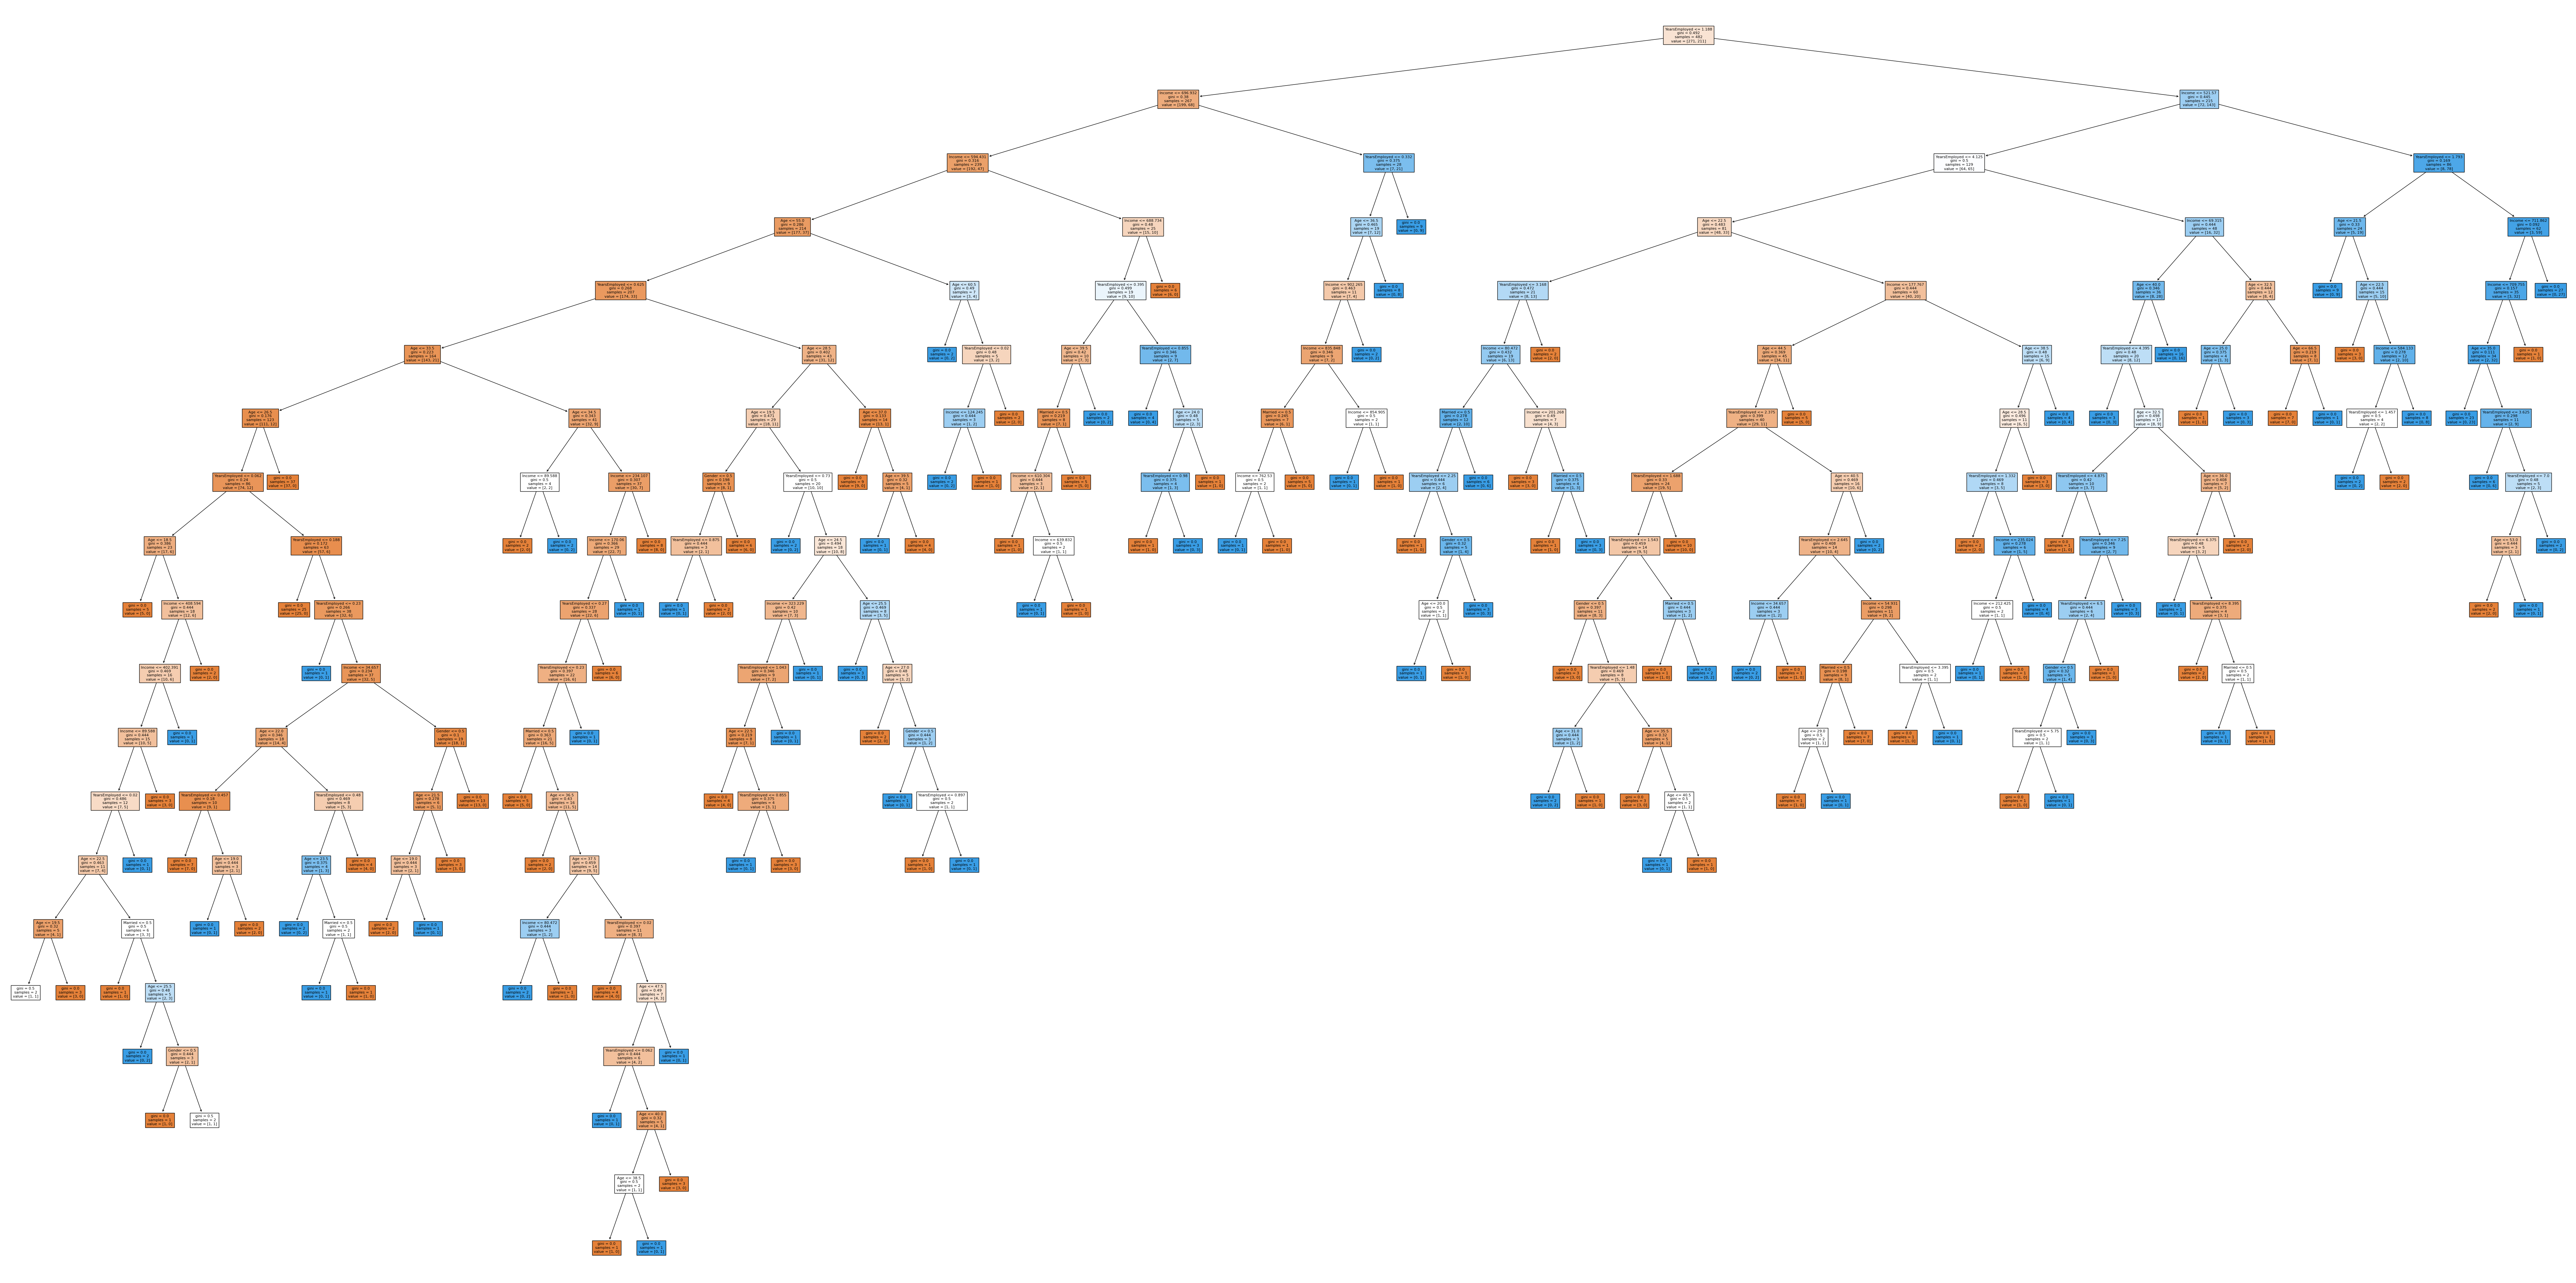

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

scale=5
plt.figure(figsize=(20*scale, 10*scale))
plot_tree(model, filled=True, feature_names=X.columns.tolist(), fontsize=8)
plt.savefig('src/tree.png')
plt.show()